In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [27]:
# Load the data, and separate the target
file_path = 'Sample.csv'
data = pd.read_csv(file_path,encoding='latin-1')
#y = home_data.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
#features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
#X = home_data[features]
#X.head()

# Split into validation and training data
#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
#rf_model = RandomForestRegressor(random_state=1)
#rf_model.fit(train_X, train_y)
#rf_val_predictions = rf_model.predict(val_X)
#rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

#print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))
data.dropna()
"as"

'as'

In [13]:
y=data.Profit

In [14]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
features=['Quantity','Sales']

In [22]:
X=data[features]

In [23]:
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=1)

In [24]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 45


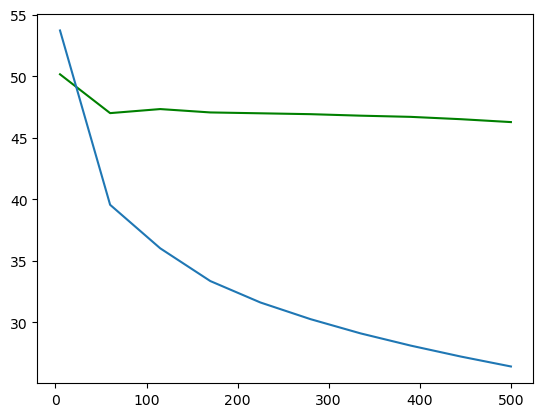

In [30]:
def get_mae(max_leaf_nodes):
    mod=RandomForestRegressor(max_leaf_nodes=max_leaf_nodes,random_state=2)
    mod.fit(train_X,train_y)
    ma1=mean_absolute_error(val_y,mod.predict(val_X))
    ma2=mean_absolute_error(train_y,mod.predict(train_X))
    return ma1,ma2

sz=np.linspace(5,500,10)

t=22222
no=0
M1,M2=0*sz,0*sz
for i in range(len(sz)):
    M1[i],M2[i]=get_mae(int(sz[i]))
    if M1[i]<t:
        t=M1[i]
        no=int(sz[i])

plt.plot(sz,M1,color='green')
plt.plot(sz,M2)

In [31]:
fullmodel=RandomForestRegressor(max_leaf_nodes=no,random_state=2)
fullmodel.fit(X,y)
print(mean_absolute_error(y,fullmodel.predict(X)))

27.288324521322743


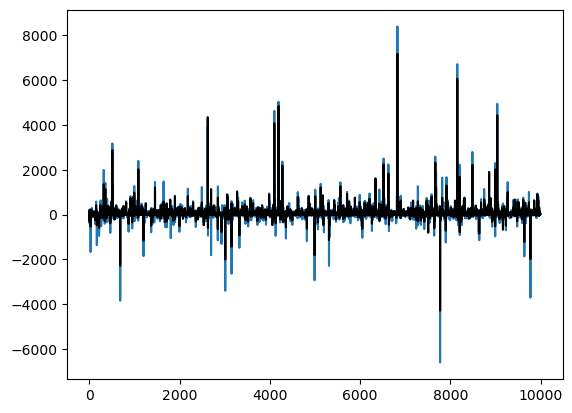

In [32]:
plt.plot(y)
plt.plot(fullmodel.predict(X),color='black')